In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("insurance_data - insurance_data.csv")

In [3]:
df.shape

(27, 2)

In [4]:
df.info

<bound method DataFrame.info of     age  bought_insurance
0    22                 0
1    25                 0
2    47                 1
3    52                 0
4    46                 1
5    56                 1
6    55                 0
7    60                 1
8    62                 1
9    61                 1
10   18                 0
11   28                 0
12   27                 0
13   29                 0
14   49                 1
15   55                 1
16   25                 1
17   58                 1
18   19                 0
19   18                 0
20   21                 0
21   26                 0
22   40                 1
23   45                 1
24   50                 1
25   54                 1
26   23                 0>

In [5]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [6]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [7]:
df.tail()

,age,bought_insurance
22,40,1
23,45,1
24,50,1
25,54,1
26,23,0


In [8]:
df.columns

Index(['age', 'bought_insurance'], dtype='object')

In [9]:
df.dtypes

age                 int64
bought_insurance    int64
dtype: object

In [10]:
df.isnull().sum().sort_values(ascending=False)

age                 0
bought_insurance    0
dtype: int64

In [11]:
# split the dataset into features and target column
x=df.drop("bought_insurance",axis=1)
y=df["bought_insurance"]

In [12]:
x.head()

,age
0,22
1,25
2,47
3,52
4,46


In [13]:
df["bought_insurance"].value_counts()

bought_insurance
1    14
0    13
Name: count, dtype: int64

<Axes: xlabel='bought_insurance', ylabel='count'>

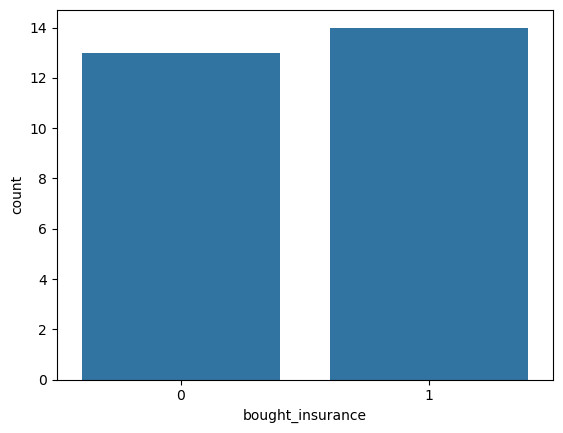

In [14]:
sns.countplot(x=df["bought_insurance"])

In [15]:
# divide into train dataset and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train.shape,y_train.shape

((21, 1), (21,))

In [17]:
x_test.shape,y_test.shape

((6, 1), (6,))

In [18]:
# apply ml algorithm into training data
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [19]:
#model prediction
y_pred=model.predict(x_test)

In [20]:
y_pred[:5]

array([1, 1, 1, 1, 1])

In [21]:
y_test[:5]

2     1
24    1
14    1
17    1
5     1
Name: bought_insurance, dtype: int64

In [26]:
model.predict_proba(x_test)

array([[0.34030833, 0.65969167],
       [0.26925593, 0.73074407],
       [0.2918862 , 0.7081138 ],
       [0.13059794, 0.86940206],
       [0.15824269, 0.84175731],
       [0.81292397, 0.18707603]])

In [22]:
#model evaluation
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

1.0

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [0, 5]])

<Axes: >

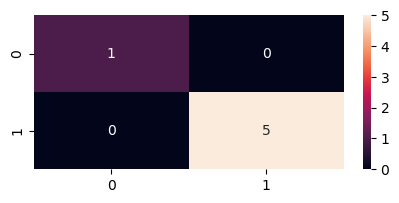

In [30]:
plt.figure(figsize=(5,2))
sns.heatmap(cm,annot=True)

In [23]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

1.0

In [24]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

1.0

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [33]:
model.coef_

array([[0.11216016]])

In [34]:
model.intercept_

array([-4.60960684])